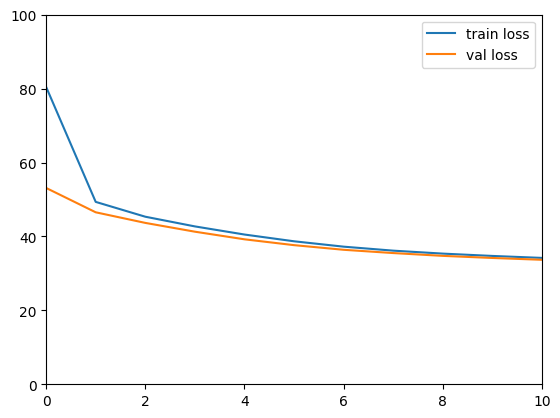

In [6]:
import vae

import torch
import matplotlib.pyplot as plt
from pathlib import Path

def plot_image(images, rescale_method="clamp", name="temp_image"):
    # Create the 4x4 grid
    plt.style.use("grayscale")
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        if rescale_method == "tanh":
            img = torch.tanh(img)
        elif rescale_method == "clamp":
            img = torch.clamp(img, 0.0, 1.0)
        elif rescale_method == "none":
            pass
        else:
            raise ValueError("Unsupported rescale method")
        img = img.permute(1, 2, 0)
        ax.imshow(img)
        ax.axis("off")

    fig.tight_layout()
    Path("../images").mkdir(parents=True, exist_ok=True)
    fig.savefig(f"../images/{name}.png")
    plt.close(fig)

checkpoint = torch.load(f"../trained_models/vae_cifar10_model.pth", map_location="cpu")
model = vae.VAE(
    in_ch=checkpoint["in_ch"],
    in_dim=checkpoint["in_dim"],
    latent_dim=checkpoint["latent_dim"],
)
model.load_state_dict(checkpoint["model_state_dict"])
batch_size = 16
samples = model.sample(batch_size)
samples = samples.reshape(batch_size, 3, 32, 32)

plot_image(samples[:16], rescale_method="clamp", name=f"vae_images_CIFAR10")

train_loss = checkpoint["train_loss"]
val_loss = checkpoint["val_loss"]
assert len(train_loss) == len(val_loss)
n_epochs = [*range(len(train_loss))]

plt.style.use("default")
plt.plot(n_epochs, train_loss, label="train loss")
plt.plot(n_epochs, val_loss, label="val loss")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.legend()
plt.show()